In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
(X_Train,_),(_,_) = mnist.load_data()

In [0]:
print(X_Train.shape)

(60000, 28, 28)


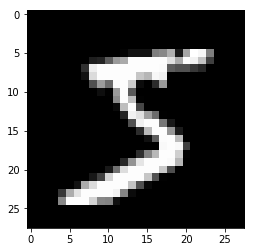

In [0]:
plt.imshow(X_Train[0],cmap='gray')
plt.show()

In [0]:
# Normalize this data [-1,1] 
X_Train  = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [0]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [0]:
# Generator 
# Input Noise (100 dim) and Outputs a Vector (784 dim)

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 784)               803600    
Total para

In [0]:
# Downsampling 
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
# GAN (Step-2)
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [0]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [0]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.7454 Generator Loss 1.0643
Epoch 2 Disc Loss 0.6192 Generator Loss 1.2390
Epoch 3 Disc Loss 0.6188 Generator Loss 1.2221
Epoch 4 Disc Loss 0.5966 Generator Loss 1.3365
Epoch 5 Disc Loss 0.5798 Generator Loss 1.3356


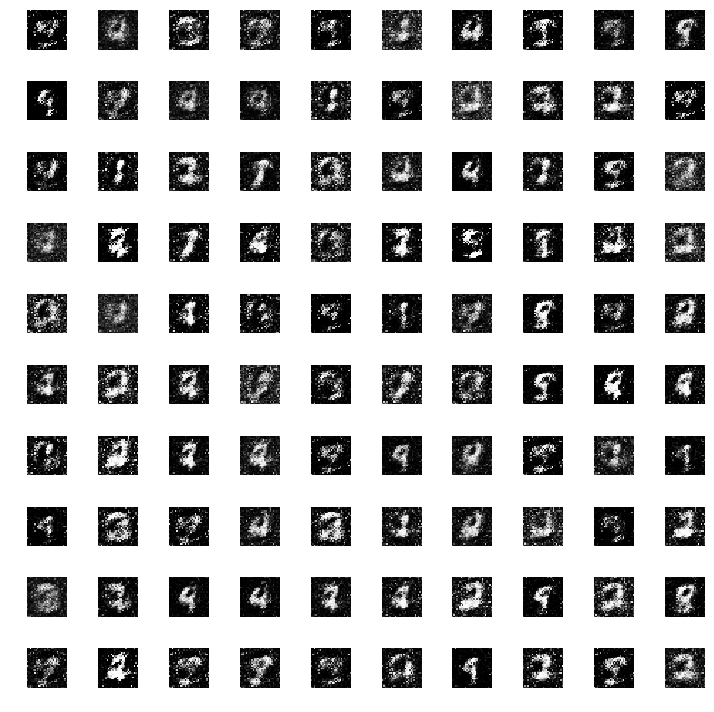

Epoch 6 Disc Loss 0.5663 Generator Loss 1.3717
Epoch 7 Disc Loss 0.5552 Generator Loss 1.3875
Epoch 8 Disc Loss 0.5571 Generator Loss 1.3720
Epoch 9 Disc Loss 0.5846 Generator Loss 1.3004
Epoch 10 Disc Loss 0.5980 Generator Loss 1.2159


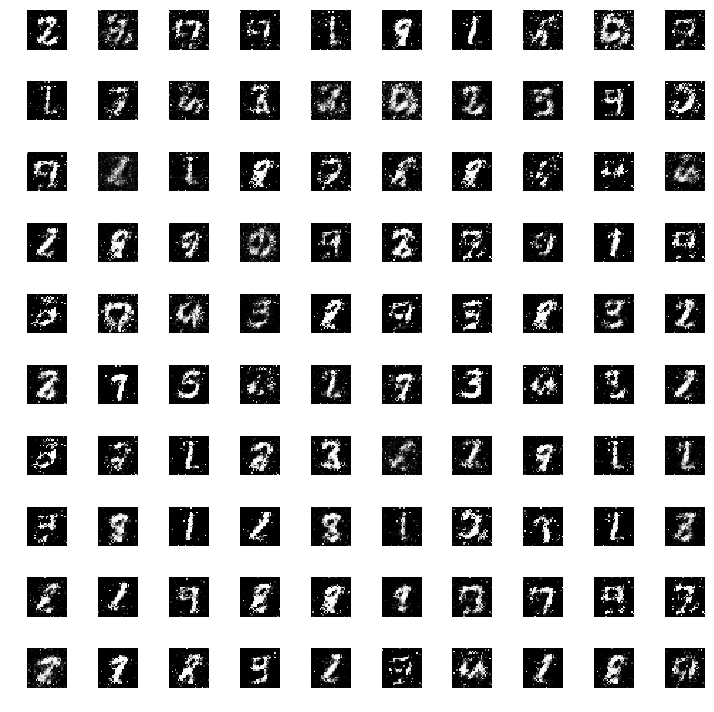

Epoch 11 Disc Loss 0.6013 Generator Loss 1.2104
Epoch 12 Disc Loss 0.6247 Generator Loss 1.1280
Epoch 13 Disc Loss 0.6352 Generator Loss 1.0738
Epoch 14 Disc Loss 0.6330 Generator Loss 1.0747
Epoch 15 Disc Loss 0.6323 Generator Loss 1.0722


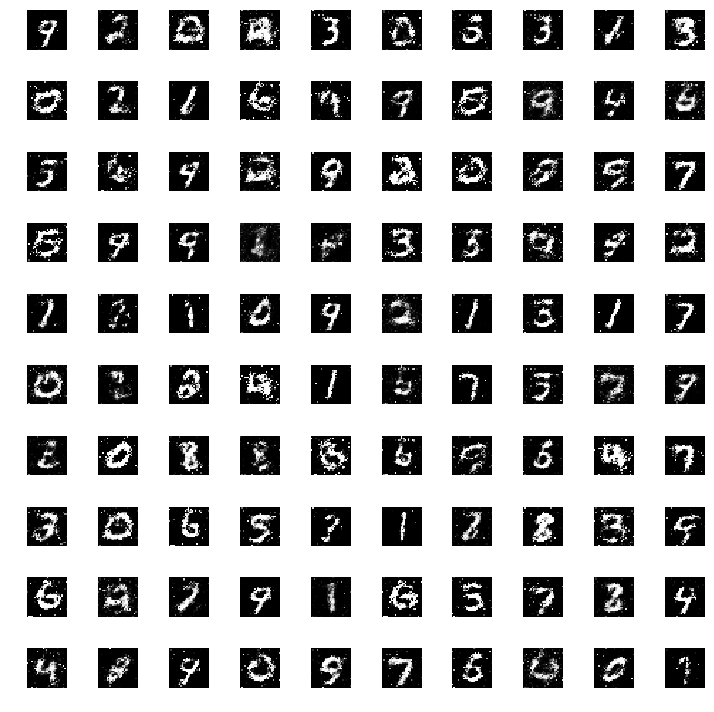

Epoch 16 Disc Loss 0.6276 Generator Loss 1.0883
Epoch 17 Disc Loss 0.6295 Generator Loss 1.0783
Epoch 18 Disc Loss 0.6341 Generator Loss 1.0660
Epoch 19 Disc Loss 0.6419 Generator Loss 1.0481
Epoch 20 Disc Loss 0.6414 Generator Loss 1.0522


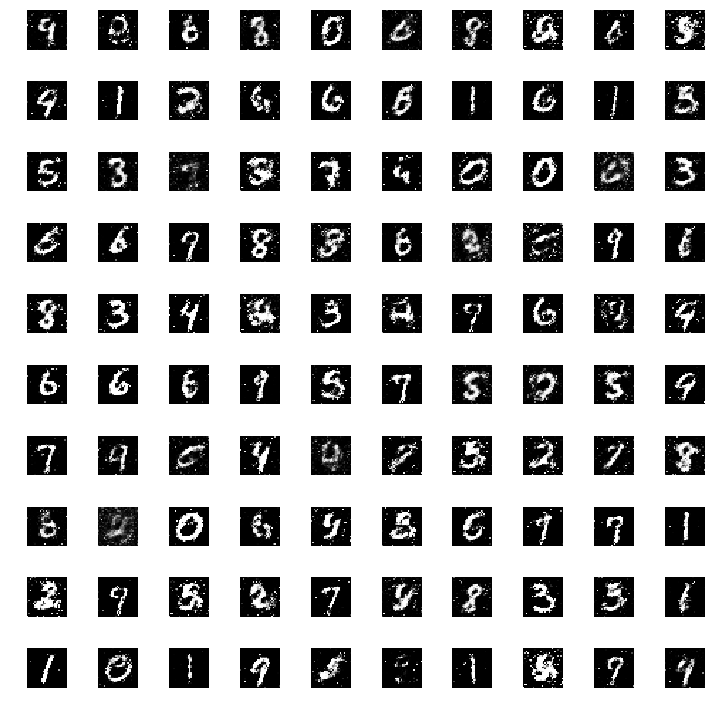

Epoch 21 Disc Loss 0.6415 Generator Loss 1.0508
Epoch 22 Disc Loss 0.6441 Generator Loss 1.0503
Epoch 23 Disc Loss 0.6472 Generator Loss 1.0359
Epoch 24 Disc Loss 0.6482 Generator Loss 1.0364
Epoch 25 Disc Loss 0.6546 Generator Loss 1.0245


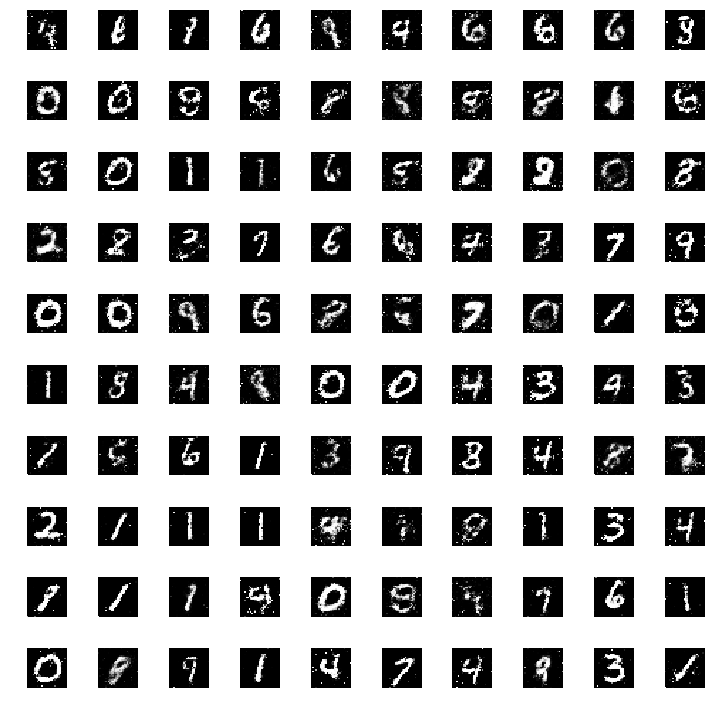

Epoch 26 Disc Loss 0.6560 Generator Loss 1.0146
Epoch 27 Disc Loss 0.6568 Generator Loss 1.0082
Epoch 28 Disc Loss 0.6589 Generator Loss 1.0141
Epoch 29 Disc Loss 0.6588 Generator Loss 1.0183
Epoch 30 Disc Loss 0.6585 Generator Loss 1.0124


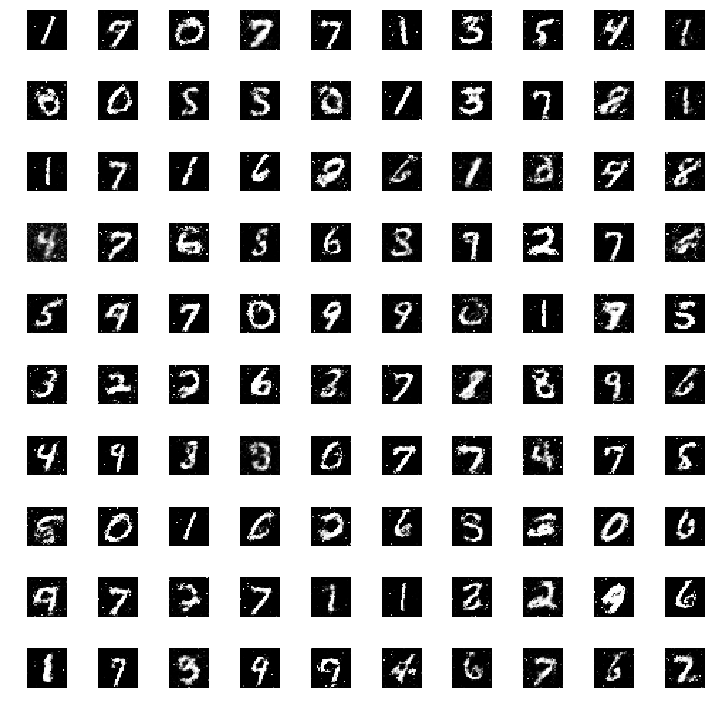

Epoch 31 Disc Loss 0.6593 Generator Loss 1.0075
Epoch 32 Disc Loss 0.6588 Generator Loss 1.0106
Epoch 33 Disc Loss 0.6593 Generator Loss 1.0084
Epoch 34 Disc Loss 0.6596 Generator Loss 1.0104
Epoch 35 Disc Loss 0.6597 Generator Loss 1.0070


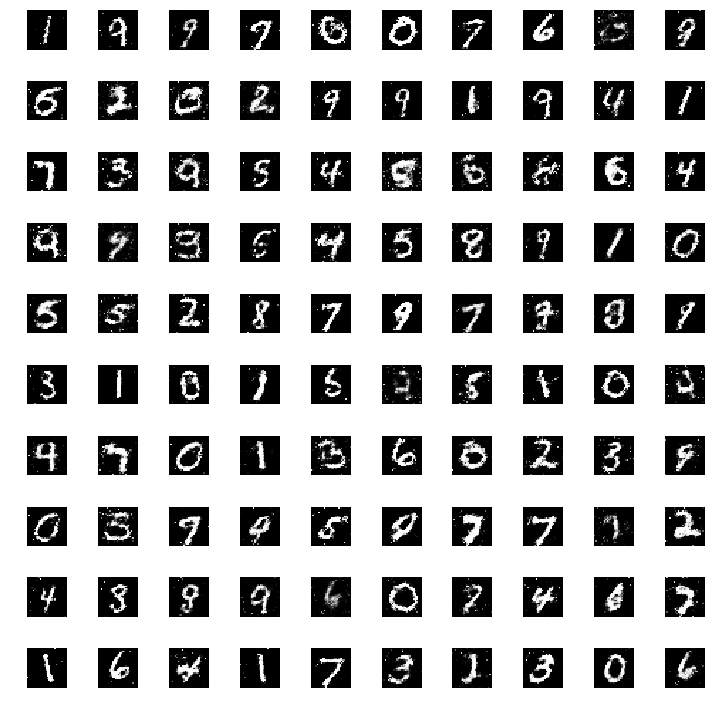

Epoch 36 Disc Loss 0.6617 Generator Loss 1.0038
Epoch 37 Disc Loss 0.6630 Generator Loss 0.9991
Epoch 38 Disc Loss 0.6616 Generator Loss 1.0020
Epoch 39 Disc Loss 0.6611 Generator Loss 1.0075
Epoch 40 Disc Loss 0.6577 Generator Loss 1.0121


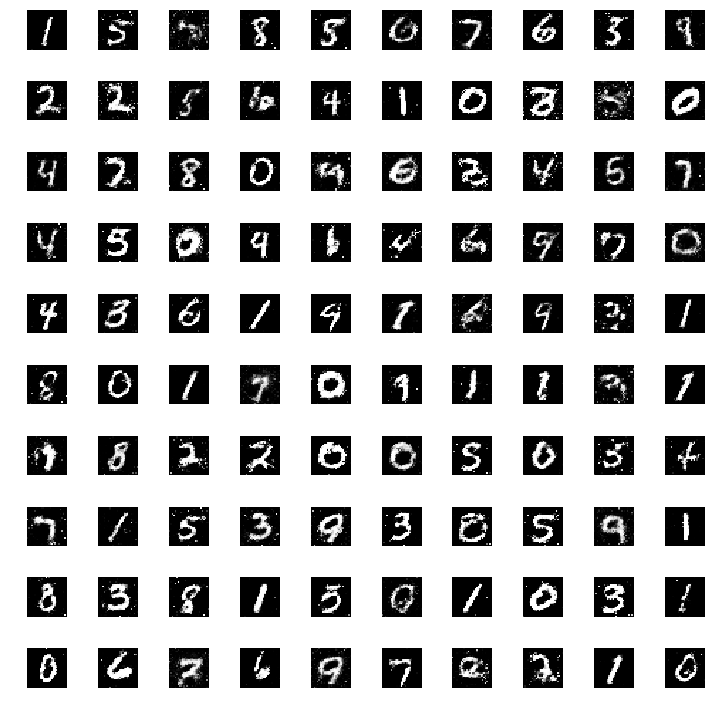

Epoch 41 Disc Loss 0.6603 Generator Loss 1.0106
Epoch 42 Disc Loss 0.6610 Generator Loss 1.0117
Epoch 43 Disc Loss 0.6630 Generator Loss 1.0005
Epoch 44 Disc Loss 0.6631 Generator Loss 1.0047
Epoch 45 Disc Loss 0.6612 Generator Loss 1.0034


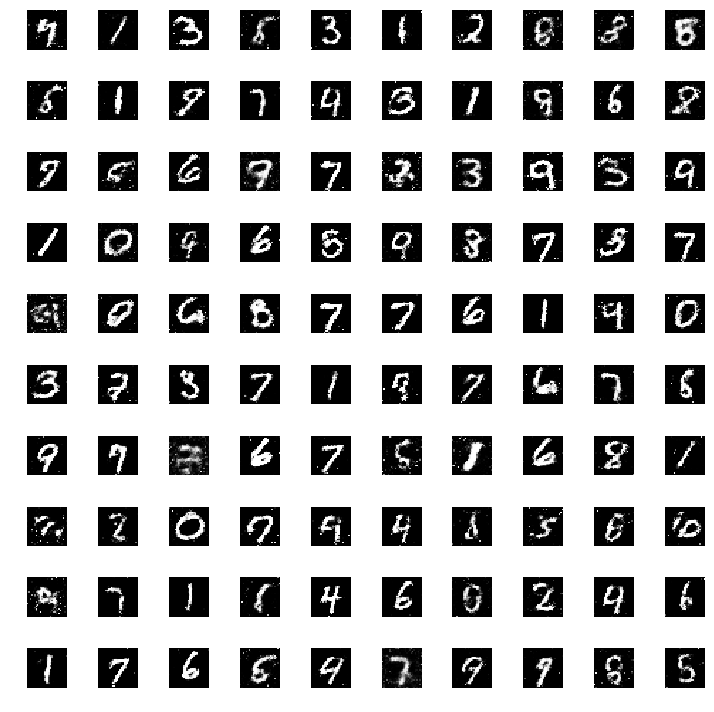

Epoch 46 Disc Loss 0.6618 Generator Loss 1.0095
Epoch 47 Disc Loss 0.6625 Generator Loss 1.0080
Epoch 48 Disc Loss 0.6639 Generator Loss 0.9992
Epoch 49 Disc Loss 0.6630 Generator Loss 1.0035
Epoch 50 Disc Loss 0.6619 Generator Loss 1.0151


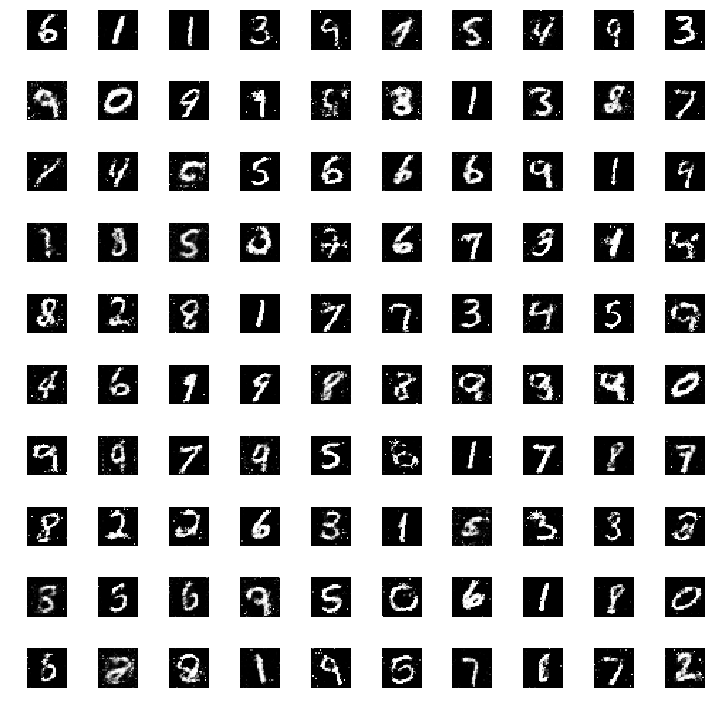

In [0]:
# Training Loop
d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
        
        
        
        

In [0]:
!mkdir images

In [0]:
!ls

images	model  sample_data


In [0]:
!zip -r /content/images.zip /content/images 

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_45.png (deflated 8%)
  adding: content/images/gan_output_epoch_15.png (deflated 8%)
  adding: content/images/gan_output_epoch_35.png (deflated 8%)
  adding: content/images/gan_output_epoch_30.png (deflated 8%)
  adding: content/images/gan_output_epoch_5.png (deflated 7%)
  adding: content/images/gan_output_epoch_50.png (deflated 8%)
  adding: content/images/gan_output_epoch_10.png (deflated 7%)
  adding: content/images/gan_output_epoch_40.png (deflated 8%)
  adding: content/images/gan_output_epoch_25.png (deflated 8%)
  adding: content/images/gan_output_epoch_20.png (deflated 8%)


In [0]:
from google.colab import files
files.download('images.zip')

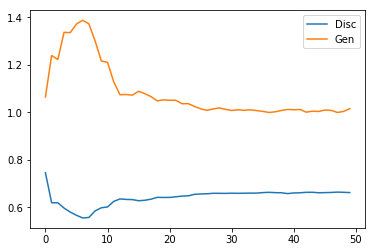

In [0]:
plt.plot(d_losses,label="Disc")
plt.plot(g_losses,label="Gen")
plt.legend()
plt.show()
